In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams.update({'errorbar.capsize': 2})

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Define the file to explore
file='resumen-Nsim351N_iter2000000N100B2.0S0.01dt0.0001.csv'

# Define the parameters for the simulation
N=100
beta=2
s=0.01

# Import the data file
df=pd.read_csv(file, engine='python')
print(df.columns.tolist())

['t', 'log_t', 'N_avg', 'std_N', 'log_N']


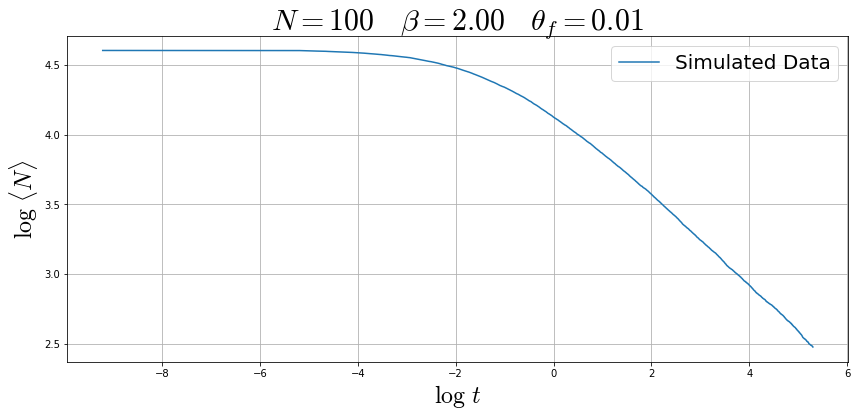

In [3]:
# Plot the entire log-data 
plt.figure(figsize=(14,6))

plt.plot(df.log_t,df.log_N, label='Simulated Data')

plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

In [32]:
# Cut the data in order to analyze the last part
# The cut-value can be changed and will change the results
cut=2
df_tail=df[(df['log_t']>cut)]

# LINEAR REGRESSION FOR MEAN VALUE

In [33]:
# Perform the linear regression for the asymptotic behaviour of the mean values
X=df_tail['log_t']
y=df_tail['log_N']

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_N   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.027e+09
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        23:20:49   Log-Likelihood:             6.6458e+06
No. Observations:             1926109   AIC:                        -1.329e+07
Df Residuals:                 1926107   BIC:                        -1.329e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2417    3.3e-05   1.29e+05      0.0

# LINEAR REGRESSION FOR UPPER BOUND

In [34]:
# Perform the linear regression for the upper bound of the data
X=df_tail['log_t']
y=df_tail['log_N']+np.log(df_tail['std_N'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.910e+08
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        23:20:50   Log-Likelihood:             4.0718e+06
No. Observations:             1926109   AIC:                        -8.144e+06
Df Residuals:                 1926107   BIC:                        -8.144e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6699      0.000   4.52e+04      0.0

# LINEAR REGRESSION FOR LOWER BOUND

In [35]:
# Perform the linear regression for the lower bound of the data
X=df_tail['log_t']
y=df_tail['log_N']-np.log(df_tail['std_N'])

X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 7.406e+07
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        23:20:51   Log-Likelihood:             4.5810e+06
No. Observations:             1926109   AIC:                        -9.162e+06
Df Residuals:                 1926107   BIC:                        -9.162e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8135   9.64e-05   2.92e+04      0.0

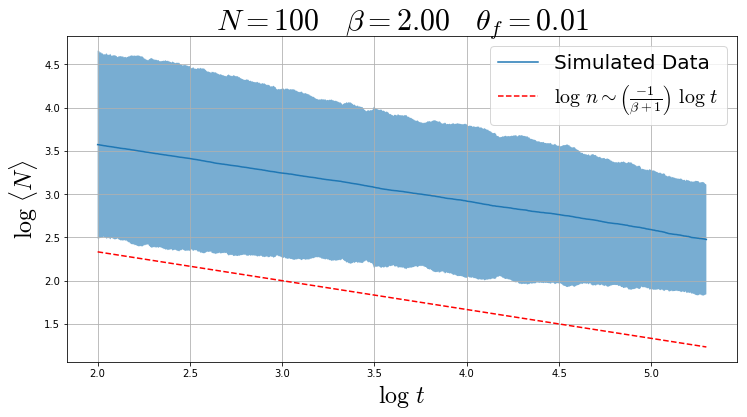

In [36]:
# Plot the partial data with the theoretical behaviour 
plt.figure(figsize=(12,6))

# Define the data for the theoretical behaviour comparison
xreg=np.linspace(min(df_tail.log_t),max(df_tail.log_t))
yreg=-(1.0/(beta+1.0))*xreg+3.0

plt.plot(df_tail.log_t,df_tail.log_N,label='Simulated Data')

ecu=r'$\log \ n \sim  \left( \frac{-1}{\beta+1} \right) \ \log \ t$'
plt.plot(xreg,yreg,'--',c='red',label=ecu)

upper=df_tail['log_N']+np.log(df_tail['std_N'])
lower=df_tail['log_N']-np.log(df_tail['std_N'])
plt.fill_between(df_tail.log_t,upper,lower,alpha=0.6)

#plt.ylim(1.5,6.5)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

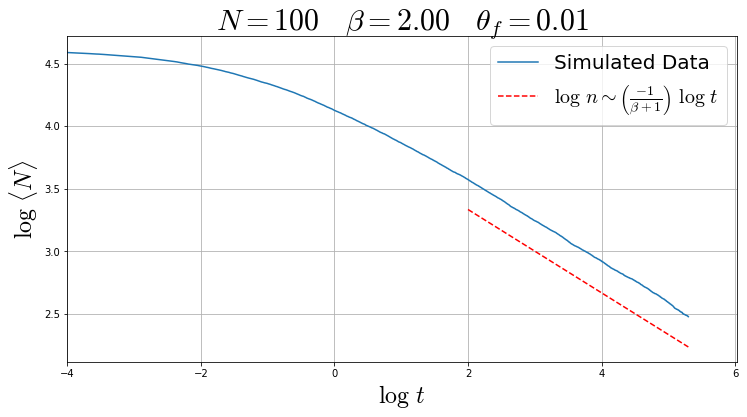

In [37]:
plt.figure(figsize=(12,6))

xreg=np.linspace(min(df_tail.log_t),max(df_tail.log_t))
yreg=-(1.0/(beta+1.0))*xreg+4.0

plt.plot(df.log_t,df.log_N,label='Simulated Data')

ecu=r'$\log \ n \sim  \left( \frac{-1}{\beta+1} \right) \ \log \ t$'
plt.plot(xreg,yreg,'--',c='red',label=ecu)

plt.xlim(-4)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


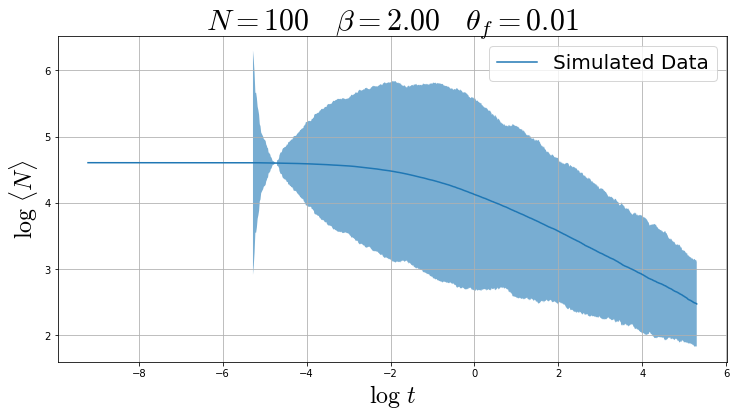

In [38]:
plt.figure(figsize=(12,6))

plt.plot(df.log_t,df.log_N,label='Simulated Data')

upper=df['log_N']+np.log(df['std_N'])
lower=df['log_N']-np.log(df['std_N'])
plt.fill_between(df.log_t,upper,lower,alpha=0.6)

plt.title(r'$N=%i \quad \beta=%.2f \quad \theta_f=%g$'%(N,beta,s),fontsize=30)
plt.xlabel(r'$\log \ t$',fontsize=24)
plt.ylabel(r'$\log \ \langle N \rangle $',fontsize=24)

plt.grid(zorder=3)
plt.legend(fontsize=20)
plt.show()
plt.close()